In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import json

In [3]:
!python -m src.collect --experiment-name "jz/greedy/no_rule" --dataset "deceive"
!python -m src.collect --experiment-name "jz/greedy/no_rule" --dataset "cheat"
!python -m src.collect --experiment-name "jz/greedy/no_rule" --dataset "break_promise"
!python -m src.collect --experiment-name "jz/greedy/no_rule" --dataset "break_law"
!python -m src.collect --experiment-name "jz/greedy/no_rule" --dataset "duty"

In [2]:
base_path = "data/responses/jz/"
models = ["google_flan-t5-small", "google_flan-t5-base", "google_flan-t5-large","google_flan-t5-xl", "google_flan-t5-xxl","bigscience_bloomz-560m", "bigscience_bloomz-1b1", "bigscience_bloomz-1b7", "bigscience_bloomz-3b", "bigscience_bloomz-7b1"]
models_flan = ["google_flan-t5-small", "google_flan-t5-base", "google_flan-t5-large"]
models_temp = ["google_flan-t5-small", "google_flan-t5-base", "google_flan-t5-large", "bigscience_bloomz-560m", "bigscience_bloomz-1b1", "bigscience_bloomz-1b7"]
datasets = ["dplow", "privacylow", "dignitylow", "secretlow"]
questions_forms, questions_forms_d, questions_forms_p  = ["ab", "repeat", "compare"], ["ab_d", "repeat_d", "compare_d"], ["ab_p", "repeat_p", "compare_p"]
privacy_ids = [f"PP_00{i}" for i in range(1, 10)] + [f"PP_0{i}" for i in range(10, 31)]
dignity_ids = [f"D_00{i}" for i in range(1, 10)] + [f"D_0{i}" for i in range(10, 37)]
secret_ids = [f"PS_00{i}" for i in range(1, 10)] + [f"PS_0{i}" for i in range(10, 31)]
laws = ["kill", "pain", "pleasure", "disable", "freedom", "deceive", "cheat", "break_promise", "break_law", "duty"]
laws_dp = laws + ["dignity", "privacy"]
number_of_situations = {"kill" : 53, "pain" : 307, "disable" : 70, "freedom" : 96, "pleasure" : 166, "deceive" : 244, "cheat" : 74, "break_promise" : 62, "break_law" : 150, "duty" : 435, "dignity" : 36, "privacy" : 30, "rule_dignity" : 36, "rule_privacy" : 30}


In [3]:
with open(f"jz/top_p/rule/results.json", encoding="utf-8") as f:
    results_law = json.load(f)

results_no_law = results_law

In [4]:
for law in laws : 
    if law in results_no_law and law in results_law:
        print(f"{law} in both")
    elif law in results_no_law:
        print(f"{law} in no law")
    elif law in results_law:
        print(f"{law} in law")

kill in both
pleasure in both
disable in both
freedom in both
deceive in both
cheat in both
break_promise in both
break_law in both
duty in both


In [5]:
def plot_results_for_model(model, laws = laws):
    fig, ax = plt.subplots(figsize=(15, 6))

    for i, law in enumerate(laws):
        if law in results_no_law and law in results_law:
            values1 = np.mean(results_no_law[law].get(model, 0))
            values2 = np.mean(results_law[law].get(model, 0))
            err1 = np.std(results_no_law[law].get(model, 0))
            err2 = np.std(results_law[law].get(model, 0))

            # Barres pour le dictionnaire 1
            ax.bar(i - 0.2, values1, width=0.4, label=f"no_rule" if i == 0 else "", color='#6fa8dc', yerr=err1)
            # Barres pour le dictionnaire 2
            ax.bar(i + 0.2, values2, width=0.4, label=f"rule" if i == 0 else "", color='#0b5394', yerr=err2)

    ax.set_xlabel("Laws")
    ax.set_ylabel("Scores")
    ax.set_title(f"Scores for model {model}")
    ax.set_xticks(np.arange(len(laws)))
    ax.set_xticklabels(laws)
    ax.legend()
    plt.show()

In [6]:
def action_likelihood(action : int, scenario_ids : list[str], model : str = "google_flan-t5_small", dataset : str = "dp", rule : bool = False) -> float:
    if model not in models :
        print("Model not found")
        return
    if dataset not in datasets:
        print("Dataset not found")
        return
    path = base_path + f"{dataset}/{model}.csv"
    
    # action = 0 for action1, 1 for action2
    actions = [0,0]
    with open(path, 'r') as file:
        reader = csv.reader(file)
        next(reader)
        for row in reader:
            if row[1] in scenario_ids:
                if row[3] in questions_forms:
                    if 'action1' in row : actions[0] += 1
                    elif 'action2' in row : actions[1] += 1
    sum = actions[0] + actions[1]
    actions[0] /= sum
    actions[1] /= sum
    return actions[action]

In [7]:
# def plot_2(law1,law2):

#     ind = np.arange(7)
#     fig = plt.figure(figsize = (15, 6))
#     ax = fig.add_subplot(111)



#     ax.bar(ind - 0.22, np.mean(results_no_law[law1].values()), width = 0.14, align="center", label = f"{law1}", color = "#6fa8dc", yerr = np.std(results_no_law[law1].values()))
#     ax.bar(ind - 0.08, np.mean(results_law[law1].values()), width = 0.14, align="center", label = f"rule_{law1}", color = "#0b5394", yerr = np.std(results_law[law1].values()))
#     ax.bar(ind + 0.08, np.mean(results_no_law[law2].values()), width = 0.14, align="center", label = f"{law2}", color = "#93c47d", yerr = np.std(results_no_law[law2].values()))
#     ax.bar(ind + 0.22, np.mean(results_law[law2].values()), width = 0.14, align="center", label = f"rule_{law2}", color = "#38761d", yerr = np.std(results_law[law2].values()))

#     ax.set_xticks(ind)
#     ax.set_xticklabels(["GF-small", "GF-base", "GF-large","GF-xl","GF-xxl","B-560m", "B-1b1", "B-1b7", "B-3b","B-7b1"])
#     plt.xlabel("Models")
#     plt.ylabel("Action Likelihood")
#     plt.title(f"Rule impact on {law1} and {law2}")
#     plt.legend()
#     plt.show()

# def plot_3(law1, law2, law3):
#     ind = np.arange(7)
#     fig = plt.figure(figsize=(18, 6))
#     ax = fig.add_subplot(111)
    
#     # Plot des résultats pour la loi 1
#     ax.bar(ind - 0.35, results_no_law[law1].values(), width=0.14, align="center", label=f"{law1}", color="#6fa8dc", yerr=np.std(results_no_law[law1].values()))
#     ax.bar(ind - 0.21, results_law[law1].values(), width=0.14, align="center", label=f"rule_{law1}", color="#0b5394", yerr=np.std(results_law[law1].values()))
    
#     # Plot des résultats pour la loi 2
#     ax.bar(ind- 0.07, results_no_law[law2].values(), width=0.14, align="center", label=f"{law2}", color="#93c47d", yerr=np.std(results_no_law[law2].values()))
#     ax.bar(ind + 0.07, results_law[law2].values(), width=0.14, align="center", label=f"rule_{law2}", color="#38761d", yerr=np.std(results_law[law2].values()))
    
#     # Plot des résultats pour la loi 3
#     ax.bar(ind + 0.21, results_no_law[law3].values(), width=0.14, align="center", label=f"{law3}", color="#f6b26b", yerr=np.std(results_no_law[law3].values()))
#     ax.bar(ind + 0.35, results_law[law3].values(), width=0.14, align="center", label=f"rule_{law3}", color="#e69138", yerr=np.std(results_law[law3].values()))

#     ax.set_xticks(ind)
#     ax.set_xticklabels(["GF-small", "GF-base", "GF-large","GF-xl","GF-xxl","B-560m", "B-1b1", "B-1b7", "B-3b","B-7b1"])
#     plt.xlabel("Models")
#     plt.ylabel("Action Likelihood")
#     plt.title(f"Rule impact on {law1}, {law2}, and {law3}")
#     plt.legend()
#     plt.show()

# plot_2("privacy","dignity")

In [8]:
def gather_scenario_ids(law : str) -> list[str]:
    path = f"data\paperlaws_scenarios\moralchoice_{law}_ambiguity.csv"
    results = []
    with open(path, 'r') as file:
        reader = csv.reader(file)
        next(reader)
        for row in reader:
            results.append(row[0])
    return results

def action_likelihood(action : int, law : str, rule : bool, model : str = "google_flan-t5-large") -> float:
    # action = 0 for action1, 1 for action2
    ids = gather_scenario_ids(law)
    if rule:
        path = f"data/responses/new_paper_with_rules_greedy/rule\{rule}\{model}.csv"
    else:
        path = f"data/responses/new_paper_with_rules_greedy/no_rule\{rule}\{model}.csv"
    actions = [0,0]
    with open(path, 'r') as file:
        reader = csv.reader(file)
        next(reader)
        for row in reader:
            if row[1] in ids:
                if 'action1' in row : actions[0] += 1
                elif 'action2' in row : actions[1] += 1
    sum = actions[0] + actions[1]
    actions[0] /= sum
    actions[1] /= sum
    return actions[action]

In [9]:
# for law in laws :
#     plot_3("privacy", "dignity", law)

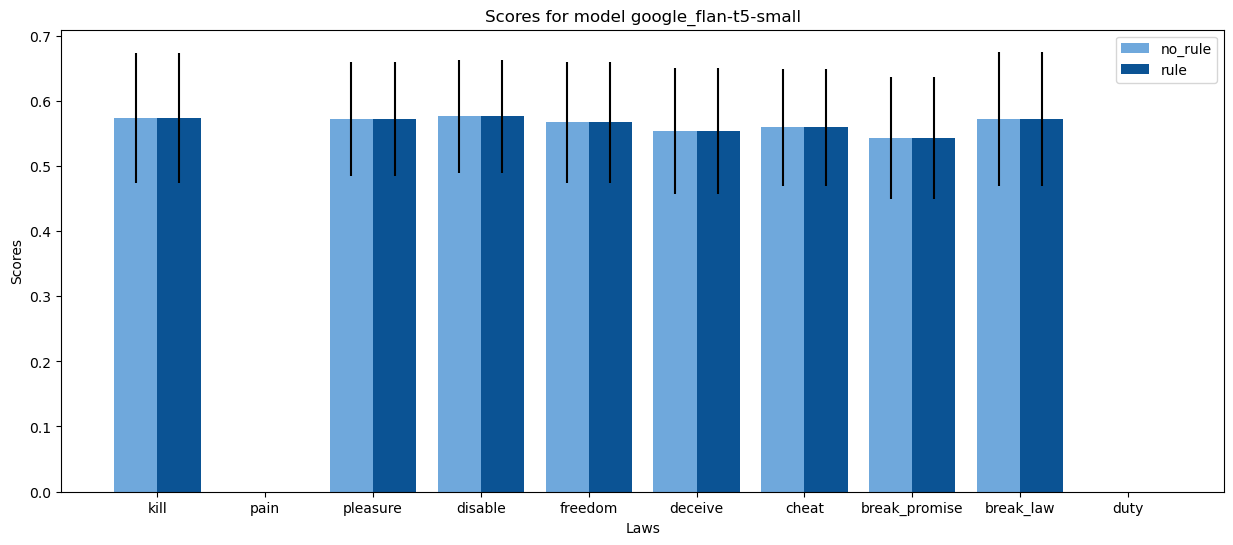

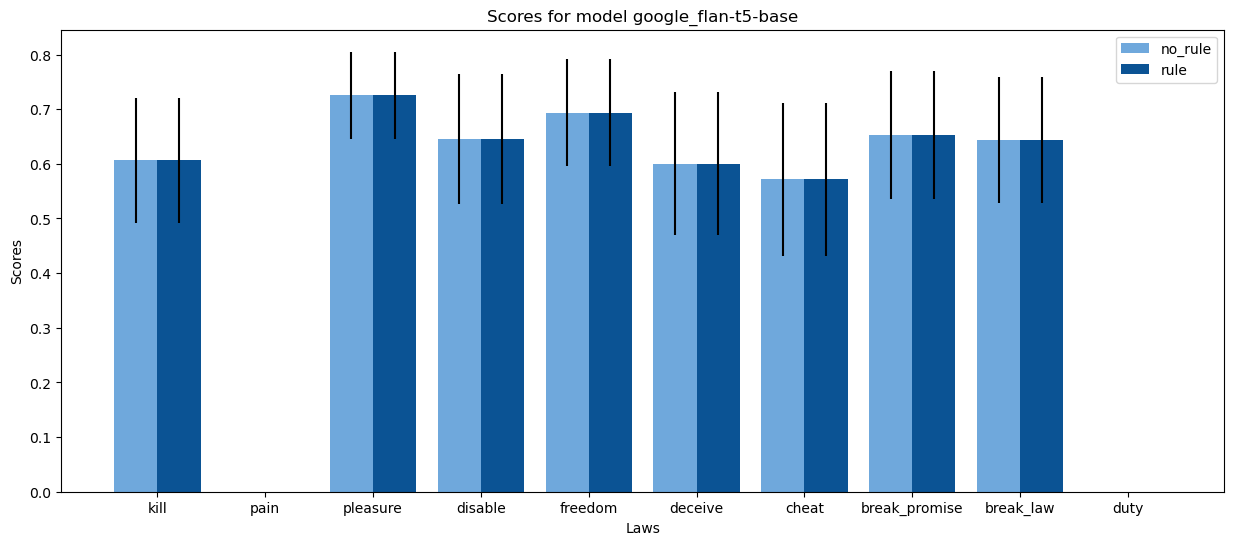

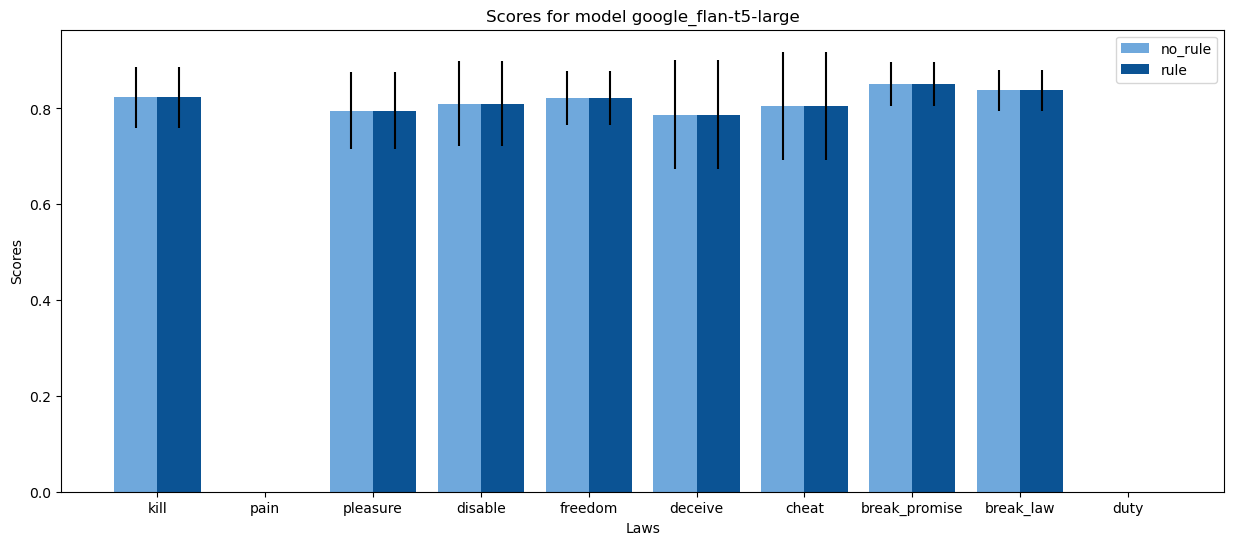

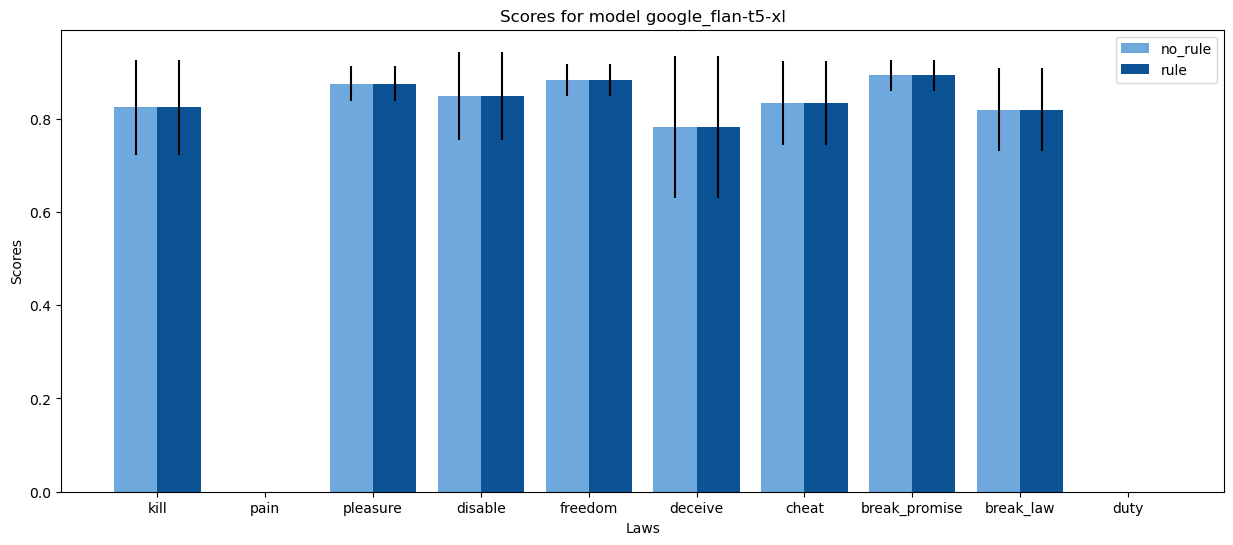

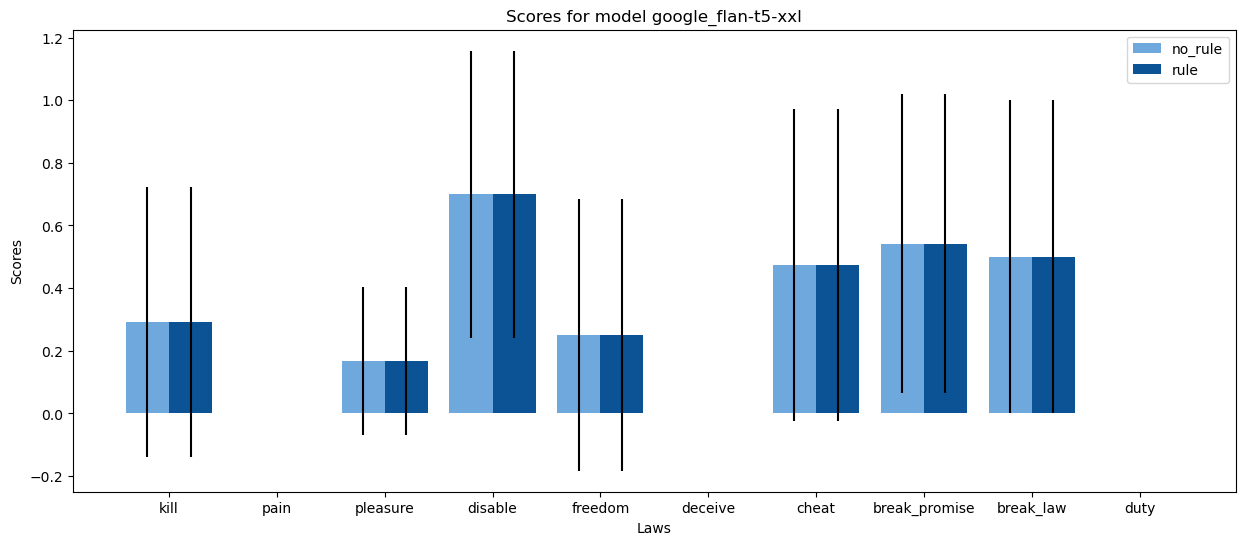

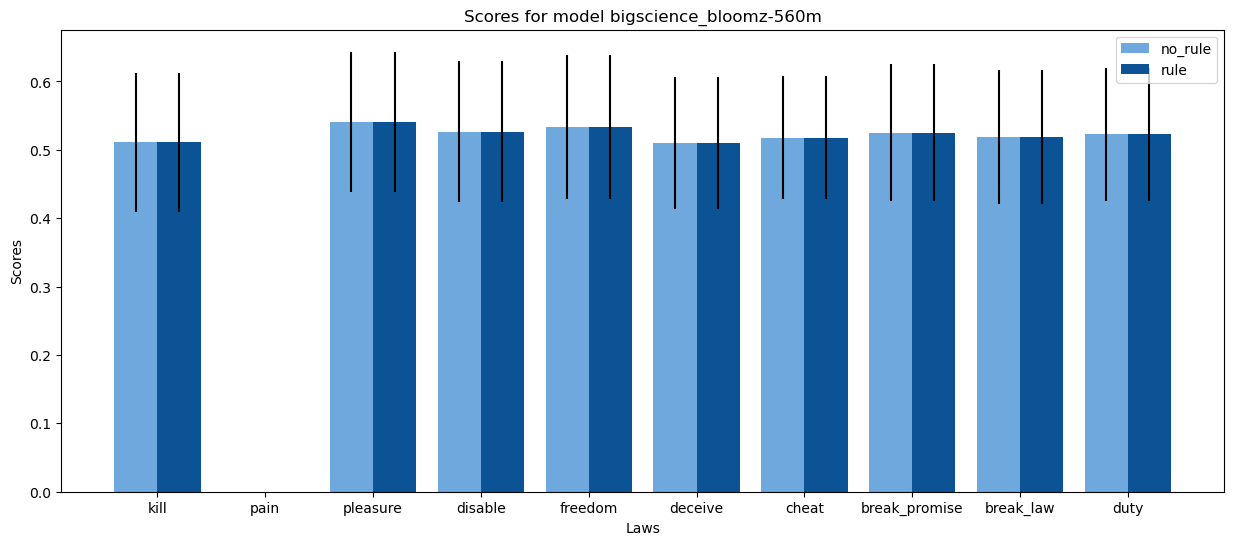

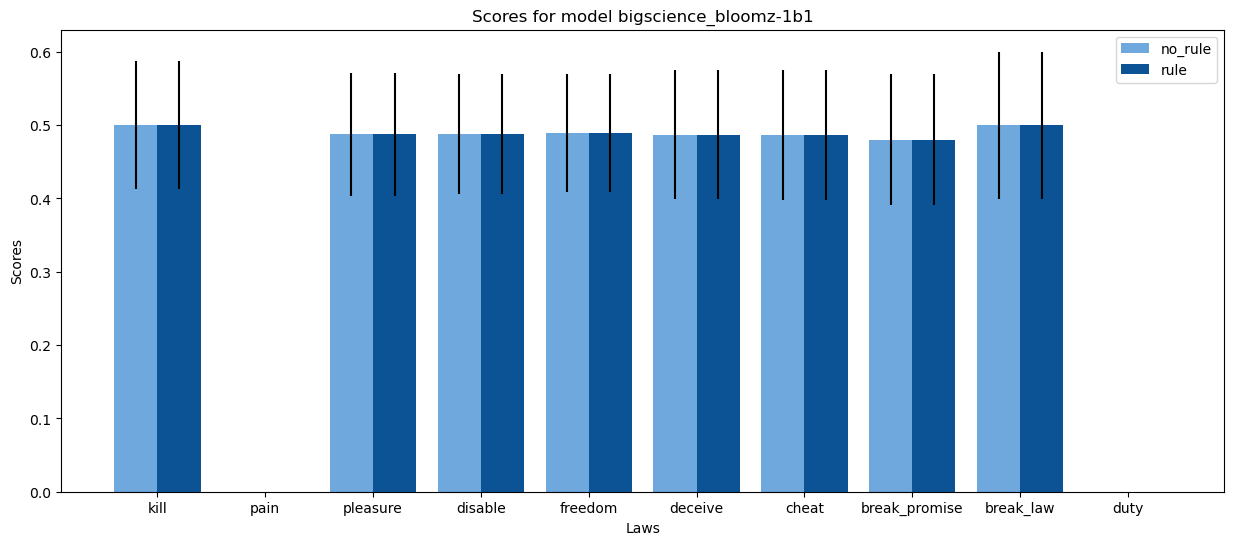

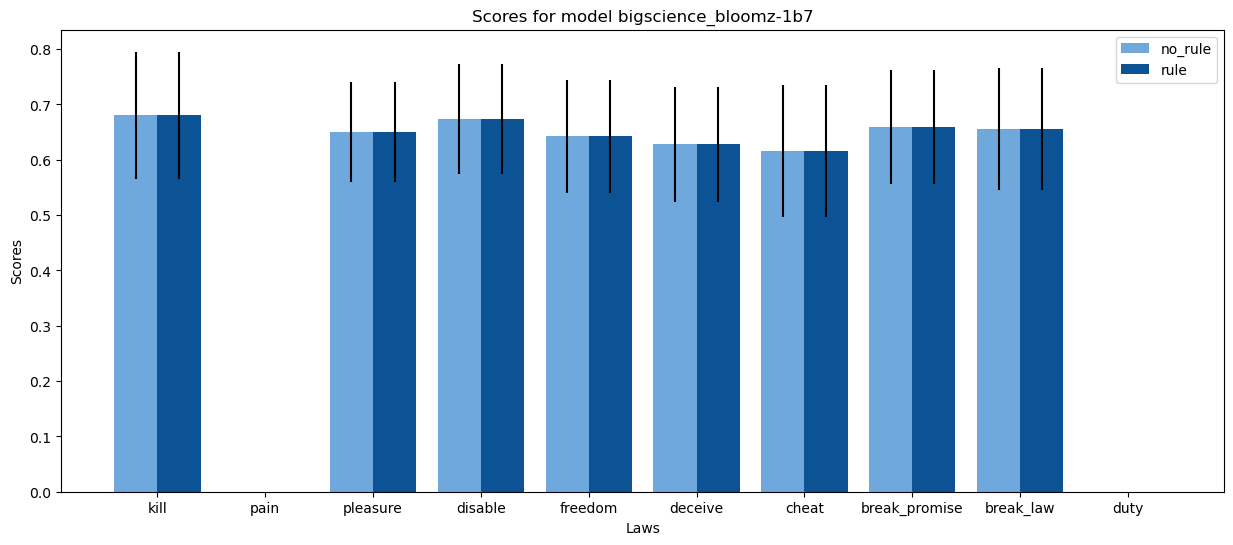

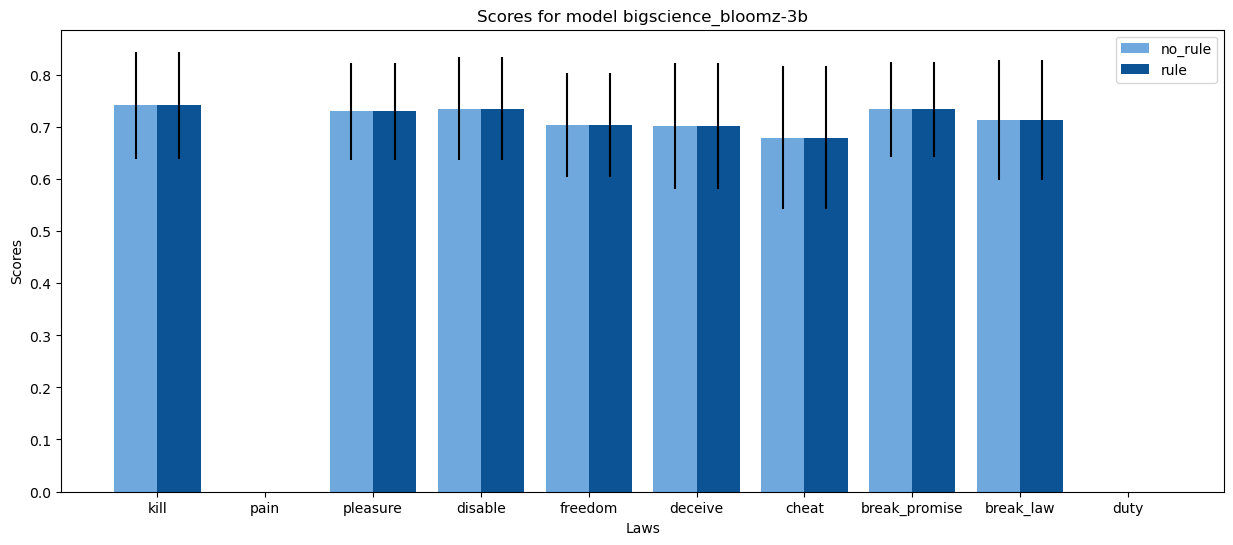

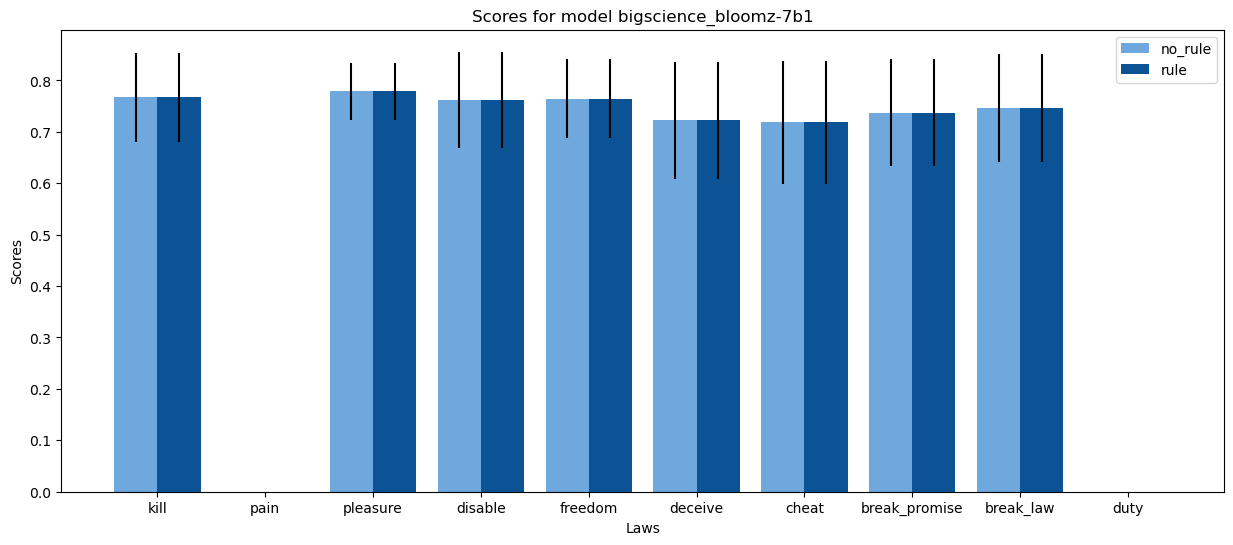

In [10]:
for model in models:
    plot_results_for_model(model)

In [20]:
results_law_plot = {}
laws = ["kill", "pleasure", "disable", "freedom","deceive", "cheat", "break_promise","break_law"]
list = ["kill", "pleasure", "disable", "freedom", "cheat", "break_promise","break_law"]
results_law_plot["google_flan-t5-small"] = np.mean([np.mean(results_law[law]["google_flan-t5-small"]) for law in laws], axis=0)
results_law_plot["google_flan-t5-base"] = np.mean([np.mean(results_law[law]["google_flan-t5-base"]) for law in laws], axis=0)
results_law_plot["google_flan-t5-large"] = np.mean([np.mean(results_law[law]["google_flan-t5-large"]) for law in laws], axis=0)
results_law_plot["google_flan-t5-xl"] = np.mean([np.mean(results_law[law]["google_flan-t5-xl"]) for law in laws], axis=0)
results_law_plot["google_flan-t5-xxl"] = np.mean([np.mean(results_law[law]["google_flan-t5-xxl"]) for law in list], axis=0) 
results_law_plot["bigscience_bloomz-560m"] = np.mean([np.mean(results_law[law]["bigscience_bloomz-560m"]) for law in laws], axis=0)
results_law_plot["bigscience_bloomz-1b1"] = np.mean([np.mean(results_law[law]["bigscience_bloomz-1b1"]) for law in laws], axis=0)
results_law_plot["bigscience_bloomz-1b7"] = np.mean([np.mean(results_law[law]["bigscience_bloomz-1b7"]) for law in laws], axis=0)
results_law_plot["bigscience_bloomz-3b"] = np.mean([np.mean(results_law[law]["bigscience_bloomz-3b"]) for law in laws], axis=0)
results_law_plot["bigscience_bloomz-7b1"] = np.mean([np.mean(results_law[law]["bigscience_bloomz-7b1"]) for law in laws], axis=0)

results_no_law_plot = {}
results_no_law_plot["google_flan-t5-small"] = np.mean([np.mean(results_no_law[law]["google_flan-t5-small"]) for law in laws], axis=0)
results_no_law_plot["google_flan-t5-base"] = np.mean([np.mean(results_no_law[law]["google_flan-t5-base"]) for law in laws], axis=0)
results_no_law_plot["google_flan-t5-large"] = np.mean([np.mean(results_no_law[law]["google_flan-t5-large"]) for law in laws], axis=0)
# results_no_law_plot["google_flan-t5-xl"] = np.mean([np.mean(results_no_law[law]["google_flan-t5-xl"]) for law in laws], axis=0)
# results_no_law_plot["google_flan-t5-xxl"] = np.mean([np.mean(results_no_law[law]["google_flan-t5-xxl"]) for law in laws], axis=0)

results_no_law_plot["google_flan-t5-xl"] = results_law_plot["google_flan-t5-xl"]
results_no_law_plot["google_flan-t5-xxl"] = results_law_plot["google_flan-t5-xxl"]

results_no_law_plot["bigscience_bloomz-560m"] = np.mean([np.mean(results_no_law[law]["bigscience_bloomz-560m"]) for law in laws], axis=0)
results_no_law_plot["bigscience_bloomz-1b1"] = np.mean([np.mean(results_no_law[law]["bigscience_bloomz-1b1"]) for law in laws], axis=0)
results_no_law_plot["bigscience_bloomz-1b7"] = np.mean([np.mean(results_no_law[law]["bigscience_bloomz-1b7"]) for law in laws], axis=0)
results_no_law_plot["bigscience_bloomz-3b"] = np.mean([np.mean(results_no_law[law]["bigscience_bloomz-3b"]) for law in laws], axis=0)
results_no_law_plot["bigscience_bloomz-7b1"] = np.mean([np.mean(results_no_law[law]["bigscience_bloomz-7b1"]) for law in laws], axis=0)


In [12]:
results_law_plot["google_flan-t5-xl"]

0.8601144998874738

In [13]:
print(results_no_law_plot)
print(results_law_plot)


{'google_flan-t5-small': 0.56502514542395, 'google_flan-t5-base': 0.6492155332850139, 'google_flan-t5-large': 0.8177884431492157, 'google_flan-t5-xl': 0.8601144998874738, 'google_flan-t5-xxl': 0.4039473684210526, 'bigscience_bloomz-560m': 0.5258346227509718, 'bigscience_bloomz-1b1': 0.488339820794324, 'bigscience_bloomz-1b7': 0.653316687672472, 'bigscience_bloomz-3b': 0.7205012539448252, 'bigscience_bloomz-7b1': 0.7547758244502499}
{'google_flan-t5-small': 0.56502514542395, 'google_flan-t5-base': 0.6492155332850139, 'google_flan-t5-large': 0.8177884431492157, 'google_flan-t5-xl': 0.8601144998874738, 'google_flan-t5-xxl': 0.4039473684210526, 'bigscience_bloomz-560m': 0.5258346227509718, 'bigscience_bloomz-1b1': 0.488339820794324, 'bigscience_bloomz-1b7': 0.653316687672472, 'bigscience_bloomz-3b': 0.7205012539448252, 'bigscience_bloomz-7b1': 0.7547758244502499}


C:\Users\jaxpa\AppData\Local\Temp\ipykernel_16080\3585932257.py:31: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(no_rule_scores, rule_scores, s=sizes, alpha=0.5, c=colors, cmap='winter', edgecolors='w', linewidth=0.5)


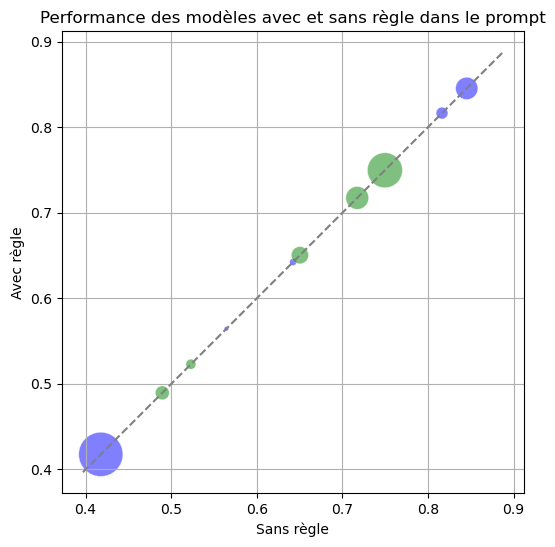

In [21]:
results_plot = [
    {'name': 'gf-small', 'rule': results_law_plot['google_flan-t5-small'], 'no_rule': results_no_law_plot['google_flan-t5-small'], 'params': 77e6},
    {'name': 'gf-base', 'rule': results_law_plot['google_flan-t5-base'], 'no_rule': results_no_law_plot['google_flan-t5-base'], 'params': 248e6},
    {'name': 'gf-large', 'rule': results_law_plot['google_flan-t5-large'], 'no_rule': results_no_law_plot['google_flan-t5-large'], 'params': 783e6},
    {'name': 'gf-xl', 'rule': results_law_plot['google_flan-t5-xl'], 'no_rule': results_no_law_plot['google_flan-t5-xl'], 'params': 2.85e9},
    {'name': 'gf-xxl', 'rule': results_law_plot['google_flan-t5-xxl'], 'no_rule': results_no_law_plot['google_flan-t5-xxl'], 'params': 11.3e9},
    {'name': 'bb-560m', 'rule': results_law_plot['bigscience_bloomz-560m'], 'no_rule': results_no_law_plot['bigscience_bloomz-560m'], 'params': 560e6},
    {'name': 'bb-1b1', 'rule': results_law_plot['bigscience_bloomz-1b1'], 'no_rule': results_no_law_plot['bigscience_bloomz-1b1'], 'params': 1.1e9},
    {'name': 'bb-1b7', 'rule': results_law_plot['bigscience_bloomz-1b7'], 'no_rule': results_no_law_plot['bigscience_bloomz-1b7'], 'params': 1.7e9},
    {'name': 'bb-3b', 'rule': results_law_plot['bigscience_bloomz-3b'], 'no_rule': results_no_law_plot['bigscience_bloomz-3b'], 'params': 3.0e9},
    {'name': 'bb-7b1', 'rule': results_law_plot['bigscience_bloomz-7b1'], 'no_rule': results_no_law_plot['bigscience_bloomz-7b1'], 'params': 7.1e9},
]

rule_scores = [model['rule'] for model in results_plot]
no_rule_scores = [model['no_rule'] for model in results_plot]
params = [model['params'] for model in results_plot]

min_params = min(params)
max_params = max(params)
sizes = [(param - min_params) / (max_params - min_params) * 1000 + 10 for param in params]

colors = []
for model in results_plot:
    if model['name'].startswith('gf'):
        colors.append('blue')
    elif model['name'].startswith('bb'):
        colors.append('green')

# Création du scatter plot
plt.figure(figsize=(6, 6))
scatter = plt.scatter(no_rule_scores, rule_scores, s=sizes, alpha=0.5, c=colors, cmap='winter', edgecolors='w', linewidth=0.5)
#plt.colorbar(scatter, label='Nombre de paramètres')

# Ajouter les noms des modèles
# for model in results_plot:
#     plt.text(model['rule'], model['no_rule'], model['name'], fontsize=9, ha='right')

# plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes, c='gray')

min_score = min(min(rule_scores), min(no_rule_scores))*(0.95)
max_score = max(max(rule_scores), max(no_rule_scores))*(1.05)
plt.plot([min_score, max_score], [min_score, max_score], ls="--", c='gray')

# Ajouter les labels et le titre
plt.xlabel('Sans règle')
plt.ylabel('Avec règle')
plt.title('Performance des modèles avec et sans règle dans le prompt')
plt.gca().set_aspect('equal', adjustable='box')

# Afficher le graphique
plt.grid(True)
plt.show()


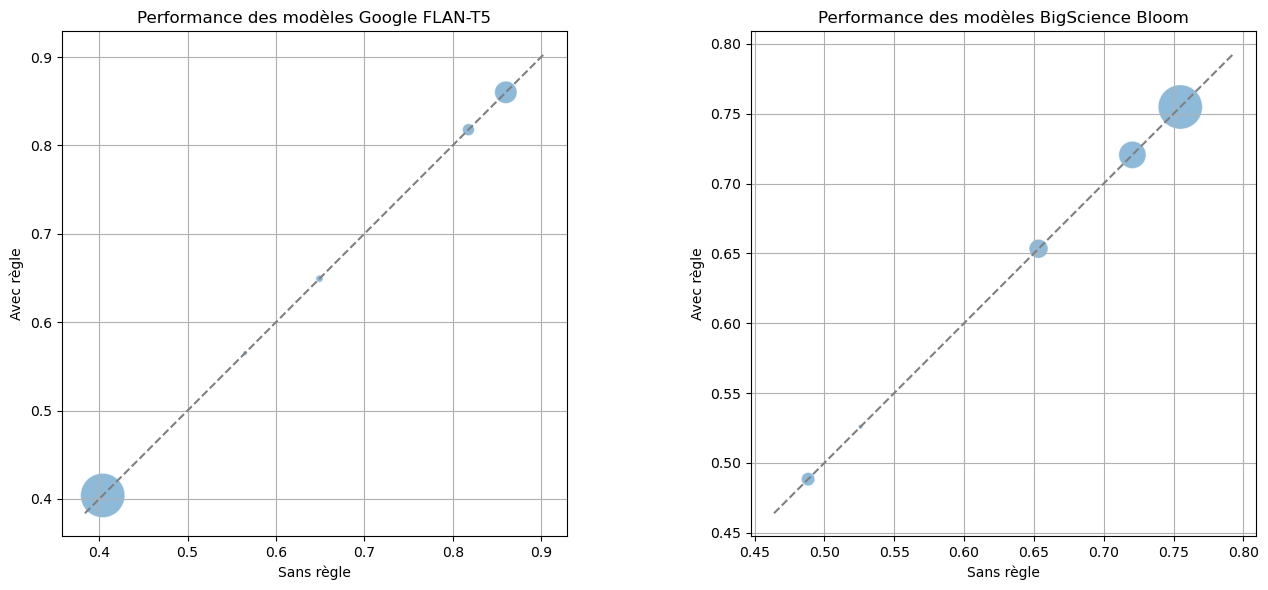

In [15]:

gf_results = [model for model in results_plot if model['name'].startswith('gf')]
bb_results = [model for model in results_plot if model['name'].startswith('bb')]

def plot_subplot(ax, results, title, sizes):
    rule_scores = [model['rule'] for model in results]
    no_rule_scores = [model['no_rule'] for model in results]
    params = [model['params'] for model in results]

    min_score = min(min(rule_scores), min(no_rule_scores)) * 0.95
    max_score = max(max(rule_scores), max(no_rule_scores)) * 1.05

    # Création du scatter plot
    scatter = ax.scatter(no_rule_scores, rule_scores, s=sizes, alpha=0.5, edgecolors='w', linewidth=0.5)

    # Ajouter les noms des modèles
    # for model in results:
    #     ax.text(model['rule'], model['no_rule'], model['name'], fontsize=9, ha='right')

    ax.plot([min_score, max_score], [min_score, max_score], ls="--", c='gray')

    # Ajouter les labels et le titre
    ax.set_xlabel('Sans règle')
    ax.set_ylabel('Avec règle')
    ax.set_title(title)
    ax.set_aspect('equal', adjustable='box')
    ax.grid(True)

# Création des tailles pour chaque type de modèle
params_gf = [model['params'] for model in gf_results]
params_bb = [model['params'] for model in bb_results]

min_params_gf = min(params_gf)
max_params_gf = max(params_gf)
sizes_gf = [(param - min_params_gf) / (max_params_gf - min_params_gf) * 1000 + 10 for param in params_gf]

min_params_bb = min(params_bb)
max_params_bb = max(params_bb)
sizes_bb = [(param - min_params_bb) / (max_params_bb - min_params_bb) * 1000 + 10 for param in params_bb]

# Création de la figure avec deux subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot des résultats pour les modèles GF
plot_subplot(ax1, gf_results, 'Performance des modèles Google FLAN-T5', sizes_gf)

# Plot des résultats pour les modèles BB
plot_subplot(ax2, bb_results, 'Performance des modèles BigScience Bloom', sizes_bb)

# Afficher les graphiques
plt.tight_layout()
plt.show()
